# Testing KSID38N varients

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import os #to get paths
import matplotlib.pyplot as plt #import matplotlib #draw graphs
import numpy as np
import pytraj as pt
from shutil import copyfile

folder_title = "AMBER_RESP_LM"

FOLDER_PA=f"0_Parent_{folder_title}"
FOLDER_EQ1 = f"3_Initial_Equilibration_{folder_title}"
FOLDER_PROD = f"4_Production_{folder_title}"

os.makedirs(f"{FOLDER_PA}", exist_ok=True)
os.makedirs(f"{FOLDER_EQ1}", exist_ok=True)
os.makedirs(f"{FOLDER_PROD}", exist_ok=True)

In [ ]:
#Old structure names for Jannik

STRUCTURES = ["1ohp_0001_127_0005_0001_3_0001_0001_21_0001", 
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001", 
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_9_0001_0001_40_0001_0001_6_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_14_0001_0001_10_0001_0001_4_0001_0001_10_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_14_0001_0001_10_0001_0001_4_0001_0001_21_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_14_0001_0001_10_0001_0001_4_0001_0001_46_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_19_0001_0001_29_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_25_0001_0001_22_0001_0001_26_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_25_0001_0001_22_0001_0001_39_0001_0001_18_0001_0001_14_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_32_0001_0001_39_0001_0001_33_0001_0001_32_0001_0001_41_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_32_0001_0001_39_0001_0001_33_0001_0001_34_0001_0001_5_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_39_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_13_0001_0001_3_0001_0001_36_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_13_0001_0001_41_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_27_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_33_0001_0001_30_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_33_0001_0001_30_0001_0001_12_0001_0001_10_0001",
              "1ohp_0001_146_0004_0001_41_0001",
              "1ohp_0001_180_0005_0001_14_0001_0001_30_0001_0001_31_0001",
              "1ohp_0001_199_0004_0001_4_0001"]

long_structures = ["1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_14_0001_0001_10_0001_0001_4_0001_0001_10_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_14_0001_0001_10_0001_0001_4_0001_0001_21_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_14_0001_0001_10_0001_0001_4_0001_0001_46_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_25_0001_0001_22_0001_0001_26_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_25_0001_0001_22_0001_0001_39_0001_0001_18_0001_0001_14_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_32_0001_0001_39_0001_0001_33_0001_0001_32_0001_0001_41_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_22_0001_0001_0_0001_0001_39_0001_0001_32_0001_0001_39_0001_0001_33_0001_0001_34_0001_0001_5_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_13_0001_0001_3_0001_0001_36_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_33_0001_0001_30_0001_0001_12_0001_0001_10_0001"]

long_structures_new_names = ["1ohp_1_127_5_1_22_1_1_4_1_1_31_1_1_14_1_1_10_1_1_4_1_1_10_1",
              "1ohp_1_127_5_1_22_1_1_4_1_1_31_1_1_14_1_1_10_1_1_4_1_1_21_1",
              "1ohp_1_127_5_1_22_1_1_4_1_1_31_1_1_14_1_1_10_1_1_4_1_1_46_1",
              "1ohp_1_127_5_1_22_1_1_22_1_1_0_1_1_39_1_1_25_1_1_22_1_1_26_1",
              "1ohp_1_127_5_1_22_1_1_22_1_1_0_1_1_39_1_1_25_1_1_22_1_1_39_1_1_18_1_1_14_1",
              "1ohp_1_127_5_1_22_1_1_22_1_1_0_1_1_39_1_1_32_1_1_39_1_1_33_1_1_32_1_1_41_1",
              "1ohp_1_127_5_1_22_1_1_22_1_1_0_1_1_39_1_1_32_1_1_39_1_1_33_1_1_34_1_1_5_0001",
              "1ohp_1_128_3_1_45_1_1_20_1_1_31_1_1_14_1_1_13_1_1_3_1_1_36_1",
              "1ohp_1_128_3_1_45_1_1_20_1_1_31_1_1_14_1_1_33_1_1_30_1_1_12_1_1_10_1"]

short_structures = ["1ohp_0001_127_0005_0001_3_0001_0001_21_0001", 
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001", 
              "1ohp_0001_127_0005_0001_22_0001_0001_4_0001_0001_31_0001_0001_9_0001_0001_40_0001_0001_6_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_19_0001_0001_29_0001",
              "1ohp_0001_127_0005_0001_22_0001_0001_39_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_13_0001_0001_41_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_27_0001",
              "1ohp_0001_128_0003_0001_45_0001_0001_20_0001_0001_31_0001_0001_14_0001_0001_33_0001_0001_30_0001",
              "1ohp_0001_146_0004_0001_41_0001",
              "1ohp_0001_180_0005_0001_14_0001_0001_30_0001_0001_31_0001",
              "1ohp_0001_199_0004_0001_4_0001"]

STRUCTURES = short_structures + long_structures_new_names

# for structure in STRUCTURES:
#     os.makedirs(f"{FOLDER_PA}/{structure}", exist_ok=True)
#     os.makedirs(f"{FOLDER_EQ1}/{structure}", exist_ok=True)
#     os.makedirs(f"{FOLDER_PROD}/{structure}", exist_ok=True)

In [4]:
#setting up folders with input structures

FOLDER_IN = "MD_structures_PMPNN"
STRUCTURES = []

for file in os.listdir(FOLDER_IN):
    name,ext = os.path.splitext(file)
    if ext != '.pdb':
        print(f"Not a pdb, {file}")
        continue
    STRUCTURES.append(name)
    os.makedirs(f"{FOLDER_PA}/{name}")
    copyfile(f"{FOLDER_IN}/{name}.pdb", f"{FOLDER_PA}/{name}/{name}_parent.pdb")

# 2 - Prepare ligands and structures

In [7]:
import re
def replace_in_file(fpath, pattern, repl):
    with open(fpath, "r") as f:
        file = f.read()
    new_file = re.sub(pattern=pattern,repl=repl,string=file)
    with open(fpath, "w") as f:
        f.write(new_file)

In [32]:
ligand = "5TS"

#replace_in_file(fpath=f"00_Ligand_setup/{ligand}.mol2", pattern='LIG',repl='5TS')
os.system(f"reduce 00_Ligand_setup/{ligand}.pdb > 00_Ligand_setup/{ligand}_H.pdb")

reduce: version 3.3 06/02/2016, Copyright 1997-2016, J. Michael Word
Processing file: "00_Ligand_setup/5TS.pdb"
Database of HETATM connections: "/sw/apps/amber22-tools22-MPI-CUDA-GCC/amber22//dat/reduce_wwPDB_het_dict.txt"
VDW dot density = 16/A^2
Orientation penalty scale = 1 (100%)
Eliminate contacts within 3 bonds.
Ignore atoms with |occupancy| <= 0.01 during adjustments.
Waters ignored if B-Factor >= 40 or |occupancy| < 0.66
Aromatic rings in amino acids accept hydrogen bonds.
Building or keeping OH & SH Hydrogens.
Rotating NH3 Hydrogens.
Not processing Met methyls.
SKIPPED H( X   1 5TS H4  ): X   1 5TS C4   bonds- X   1 5TS C5   (H bumps)
SKIPPED H( X   1 5TS H1  ): X   1 5TS C1   bonds- X   1 5TS N2   (H bumps)
Found 0 hydrogens (0 hets)
Standardized 0 hydrogens (0 hets)
Added 0 hydrogens (0 hets)
Removed 0 hydrogens (0 hets)
If you publish work which uses reduce, please cite:
Word, et. al. (1999) J. Mol. Biol. 285, 1735-1747.
For more information see http://kinemage.biochem.duke

0

In [39]:
#Creates prepi and frcmod files for the ligand

os.system(f"antechamber -i 00_Ligand_setup/{ligand}_H.mol2 -fi mol2 -o 00_Ligand_setup/{ligand}_H.prepi -c bcc -fo prepi -pf yes -dr no")  
##'-dr no' turn off acdoctor - gets upset about single/double bonds but it doesn't affect output
##'-pf yes' remove intermediate files
os.system(f"parmchk2 -i 00_Ligand_setup/{ligand}_H.prepi -f prepi -o 00_Ligand_setup/{ligand}_H.frcmod") 


Welcome to antechamber 22.0: molecular input file processor.

Info: The atom type is set to gaff; the options available to the -at flag are
      gaff, gaff2, amber, bcc, and sybyl.

Info: Total number of electrons: 84; net charge: 0

Running: /sw/apps/amber22-tools22-MPI-CUDA-GCC/amber22/bin/sqm -O -i sqm.in -o sqm.out



0

In [4]:
#Cleaning up input pdbs

for structure in STRUCTURES:
    #delete everything after 'CONECT'
    os.system(f"sed -n '/CONECT/q;p' {FOLDER_PA}/{structure}/{structure}_parent.pdb > {FOLDER_PA}/{structure}/{structure}_parentclean.pdb")
    #remove hydrogens - requires pip install of https://www.bonvinlab.org/pdb-tools/
    os.system(f"pdb_delelem -H {FOLDER_PA}/{structure}/{structure}_parentclean.pdb > {FOLDER_PA}/{structure}/{structure}_parentnoH.pdb")
    #remove ligand for the apo simulations
    os.system(f"pdb_selchain -A {FOLDER_PA}/{structure}/{structure}_parentnoH.pdb > {FOLDER_PA}/{structure}/{structure}_apoparentnoH.pdb")

In [8]:
# generating input files - parametrising system with AMBER

extension = "apo"

for structure in STRUCTURES:

    BOX = "10"

    with open("tleap.in", "w") as f:
        f.write(f"""source leaprc.protein.ff19SB 
source leaprc.gaff
source leaprc.water.tip3p
loadamberprep   00_Ligand_setup/5TS_H.prepi
loadamberparams 00_Ligand_setup/5TS_H.frcmod
mol = loadpdb {FOLDER_PA}/{structure}/{structure}_{extension}parentnoH.pdb
solvateOct mol TIP3PBOX {BOX}
saveamberparm mol {FOLDER_PA}/{structure}/{structure}_{extension}.parm7 {FOLDER_PA}/{structure}/{structure}_{extension}.rst7
quit
""")
    
    os.system("tleap -s -f tleap.in > tleap.tmp")
    
    os.system(f"ambpdb  -p {FOLDER_PA}/{structure}/{structure}_{extension}.parm7 -c {FOLDER_PA}/{structure}/{structure}_{extension}.rst7 > {FOLDER_PA}/{structure}/{structure}_{extension}.pdb")
    #!rm *.log *.in *.out

# 3 - Initial equilibration
Minimize, Heat, and Equilibrate Structures with and without constrains

In [10]:
#Write minimisation input

for structure in STRUCTURES:

    output_fpath = f"{FOLDER_EQ1}/{structure}/{structure}"
    
    os.makedirs(f"{FOLDER_EQ1}/{structure}", exist_ok=True)

    with open(f"{output_fpath}_min.in", "w") as f:
                    f.write(f"""initial minimization
&cntrl 
    imin           = 1, 
    ntmin          = 1,
    ncyc           = 10000,
    maxcyc         = 100000, 
    ntpr           = 100, 
    ntb            = 1,         !constant volume   
    nmropt         = 1,       !Restraints 
&end 
&wt TYPE='END' /  
                """) 

In [11]:
##writing heating and equilibration inputs

#restraint_mask = "@CA|:5TS,99"

#for apo change restraints
restraint_mask = "@CA|:99"

for structure in STRUCTURES:

    output_fpath = f"{FOLDER_EQ1}/{structure}/{structure}"

    with open(f"{output_fpath}_heat.in", "w") as f:
        f.write(f"""0.05 ns MD heating of system
    &cntrl 
        imin=0, irest=0, ntx=1, ig=-1,
        nstlim=50000, dt=0.001,
        ntpr=5000, ntwx=50000, ioutfm=1, ntwr=50000
        ntc=1, ntf=1, cut=8.0,
        ntb=2, ntp=1,
        ntt=3, gamma_ln=1.0, tempi=0.1, temp0=298.0,
        ntr=1, restraint_wt=100.0, restraintmask='{restraint_mask}'
        nmropt=1, !(restrains and T options)
        iwrap=1,
    /
    &wt TYPE='TEMP0', ISTEP1=5000, ISTEP2=50000, 
        VALUE1=0.1, VALUE2=298.0, 
    /
    &wt TYPE='END'/ 
    """)
    
        for i in [1,2,4,8,20]:
            with open(f"{output_fpath}_rest{i}.in", "w") as f:
                f.write(f"""0.1 ns NVT MD production with restrained backbone 
    &cntrl
        imin=0, irest=1, ntx=5, iwrap=1,
        nstlim=100000, dt=0.001,
        ntpr=10000, ntwx=10000, ioutfm=1, ntwr=10000,
        ntc=1, ntf=1, cut=8.0,
        ntb=2, ntp=1,
        ntt=3, gamma_ln=1.0, temp0=298.0
        nmropt=1, !(restraints and T options)        
        ntr=1, restraint_wt={i}, restraintmask='{restraint_mask}'
    &end
    &wt TYPE='END'/ 
    """)

        with open(f"{output_fpath}_eq.in", "w") as f:
            f.write(f"""2.0 ns NVT MD production 
    &cntrl
        imin=0, irest=1, ntx=5, 
        nstlim=2000000, dt=0.001,
        ntpr=200000, ntwx=200000, ioutfm=1, ntwr=200000,
        ntc=1, ntf=1, cut=8.0,
        ntb=2, ntp=1,
        ntt=3, gamma_ln=1.0, temp0=298.0
        nmropt=1, !(restrains and T options)  
        iwrap=1,      
    &end
    &wt TYPE='END'/ 
    """)
            
        print(output_fpath)

#nstlim=100000, dt=0.001,
#ntpr=10000, ntwx=10000, ioutfm=1, ntwr=10000,

3_Initial_Equilibration_AMBER_RESP_LM/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787/apo/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787
3_Initial_Equilibration_AMBER_RESP_LM/0.838_1ohp_Rosetta_1ohp_Rosetta_Relax_7172/apo/0.838_1ohp_Rosetta_1ohp_Rosetta_Relax_7172
3_Initial_Equilibration_AMBER_RESP_LM/0.825_1ohp_Rosetta_1ohp_Rosetta_Design_8289/apo/0.825_1ohp_Rosetta_1ohp_Rosetta_Design_8289
3_Initial_Equilibration_AMBER_RESP_LM/0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7673/apo/0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7673
3_Initial_Equilibration_AMBER_RESP_LM/0.836_1ohp_Rosetta_1ohp_Rosetta_Design_8486/apo/0.836_1ohp_Rosetta_1ohp_Rosetta_Design_8486
3_Initial_Equilibration_AMBER_RESP_LM/0.843_1ohp_Rosetta_1ohp_Rosetta_Relax_8445/apo/0.843_1ohp_Rosetta_1ohp_Rosetta_Relax_8445
3_Initial_Equilibration_AMBER_RESP_LM/0.840_1ohp_Rosetta_1ohp_Rosetta_Relax_7078/apo/0.840_1ohp_Rosetta_1ohp_Rosetta_Relax_7078
3_Initial_Equilibration_AMBER_RESP_LM/0.845_1ohp_Rosetta_1ohp_Rosetta_Relax_7369/apo/0.845_1ohp_Ro

In [23]:
def runjob_min_heat_eq(structure,experiment_folder,parent_folder):
    with open("MD.sh", "w") as f:
        f.write(f"""#!/bin/bash
#SBATCH --partition gpu_short,mwvdk
#SBATCH --time=12:00:00       # Walltime
#SBATCH --gres=gpu:1
#SBATCH --output   slurm_outputs/MHEq_{structure}.out
#SBATCH --nodes=1            # number of tasks
#SBATCH --job-name=Ml_{structure}
#SBATCH --account=ptch000721
#SBATCH --mem=10G

# 1. Load module(s)
module load apps/amber/22

# 2. Set directories
cd {os.getcwd()}

# 3. Define Variables
input_folder={experiment_folder}/{structure}
parent_fpath={parent_folder}/{structure}/{structure}

# 4. Name of old job
start_coordinates_path=$parent_fpath

# 5. Run minimisation
job_name=$input_folder/{structure}_min
echo $job_name

pmemd -O -i $job_name.in -o $job_name.log -p $parent_fpath.parm7 -ref $start_coordinates_path.rst7 \
                    -c $start_coordinates_path.rst7 -x $job_name.nc  -r $job_name.rst7   -inf $job_name.mdinf

# 6. Run heating

start_coordinates_path=$input_folder/{structure}_min

job_name=$input_folder/{structure}_heat
echo $job_name

pmemd -O -i $input_folder/{structure}_heat.in -o $job_name.log  -p $parent_fpath.parm7 \
    -ref $start_coordinates_path.rst7 -c $start_coordinates_path.rst7 -x $job_name.nc  -r $job_name.rst7 -inf $job_name.mdinf

# 7. Run equilibration

start_coordinates_path=$input_folder/{structure}_heat

for name in rest20 rest8 rest4 rest2 rest1 eq
do
    job_name=$input_folder/{structure}_$name
    echo "starting $job_name"
    pmemd.cuda -O -i $input_folder/{structure}_$name.in -o $job_name.log  -p $parent_fpath.parm7 \
                           -ref $start_coordinates_path.rst7 -c $start_coordinates_path.rst7 -x $job_name.nc  -r $job_name.rst7 -inf $job_name.mdinf

    start_coordinates_path=$job_name
    rm $job_name.nc
done
    
""")

    os.system("sbatch MD.sh")


In [24]:
for structure in STRUCTURES:
    runjob_min_heat_eq(structure,FOLDER_EQ1,FOLDER_PA)

Submitted batch job 8987263
Submitted batch job 8987264
Submitted batch job 8987265
Submitted batch job 8987266
Submitted batch job 8987267
Submitted batch job 8987268
Submitted batch job 8987269
Submitted batch job 8987270
Submitted batch job 8987271
Submitted batch job 8987272
Submitted batch job 8987273
Submitted batch job 8987274
Submitted batch job 8987275
Submitted batch job 8987276
Submitted batch job 8987277
Submitted batch job 8987278
Submitted batch job 8987279
Submitted batch job 8987280
Submitted batch job 8987281
Submitted batch job 8987282
Submitted batch job 8987283
Submitted batch job 8987284
Submitted batch job 8987285
Submitted batch job 8987286
Submitted batch job 8987287
Submitted batch job 8987288
Submitted batch job 8987289
Submitted batch job 8987290
Submitted batch job 8987291
Submitted batch job 8987292
Submitted batch job 8987293
Submitted batch job 8987294
Submitted batch job 8987295
Submitted batch job 8987296
Submitted batch job 8987297
Submitted batch job 

In [24]:
!squeue --format="%.18i %.9P %.30j %.8u %.8T %.10M %.9l %.6D %R" --me

             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)
           8956804 gpu_short Ml_0.823_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:00  12:00:00      1 (None)
           8956805 gpu_short Ml_0.820_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:00  12:00:00      1 (None)
           8956801 gpu_short Ml_0.831_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:00  12:00:00      1 (None)
           8956802 gpu_short Ml_0.813_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:00  12:00:00      1 (None)
           8956803 gpu_short Ml_0.851_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:00  12:00:00      1 (None)
           8956800 gpu_short Ml_0.823_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:00  12:00:00      1 (None)
           8956797 gpu_short Ml_0.815_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:00  12:00:00      1 (None)
           8956798 gpu_short Ml_0.840_1ohp_Rosetta_1ohp_Ros  qz22231  PENDING       0:

In [4]:
#writing endpoint PDBs from equilibration
rms_mask = '!:WAT,5TS'

for structure in STRUCTURES[:1]:

    temp = [f"parm {FOLDER_PA}/{structure}/{structure}.parm7"]
    #for index in range(1, 6):
    filename = f"{FOLDER_EQ1}/{structure}/{structure}"

    temp.append(f"reference {filename}_min.rst7")

    if os.path.isfile(f"{filename}_eq.rst7"):
        temp.append(f"trajin {filename}_eq.rst7")
    else:
        print(f'{structure} No file found')

    temp.append("autoimage")
    temp.append(f"rms Full_Prot {rms_mask} reference mass ")

    #temp.append(f"closest 1000 :LIG parmout {FOLDER_PA}/{structure}_closewater.parm7")
    temp.append(f"outtraj {FOLDER_EQ1}/{structure}/{structure}_eq.pdb")
    temp.append("EOF")

    with open("cpptraj.in", "w") as f:
        f.write("\n".join(temp))  
    os.system("cpptraj -i cpptraj.in")# > cpptraj.tmp")
    #!cpptraj -i cpptraj.in 


CPPTRAJ: Trajectory Analysis. V6.4.4 (AmberTools)
    ___  ___  ___  ___
     | \/ | \/ | \/ | 
    _|_/\_|_/\_|_/\_|_

| Date/time: 06/28/24 10:19:36
| Available memory: 115.000 GB

INPUT: Reading input from 'cpptraj.in'
  [parm 0_Parent_AMBER_RESP_LM/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787_apo.parm7]
	Reading '0_Parent_AMBER_RESP_LM/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787_apo.parm7' as Amber Topology
	Radius Set: modified Bondi radii (mbondi)
  [reference 3_Initial_Equilibration_AMBER_RESP_LM/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787/apo/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787_min.rst7]
	Reading '3_Initial_Equilibration_AMBER_RESP_LM/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787/apo/0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787_min.rst7' as Amber NC Restart
	Setting active reference for distance-based masks: '0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787_min.rst7'
  [trajin 3_Initial_Equilibration

# 4 - Production
Run 50 * 10 ns runs for each equilibrated structure (0.5 us in total)

In [5]:
for structure in STRUCTURES:
    os.makedirs(f"{FOLDER_PROD}/{structure}", exist_ok=True)
    output_fpath = f"{FOLDER_PROD}/{structure}/{structure}"
                
    with open(f"{output_fpath}_md10.in", "w") as f:
        f.write(f"""10ns NPT MD production
&cntrl
    imin=0, irest=1, ntx=5,
    nstlim=10000000, dt=0.001,
    ntpr=10000, ntwx=100000, ioutfm=1, ntwr=10000, 
    ntc=1, ntf=1, cut=8.0,  !no shake
    ntp=1, taup=1.0      !pressure 
    ntt=3, gamma_ln=1.0, temp0=298.0, !temperature
/
&wt TYPE='END'/ 
""")
        

#     with open(f"{output_fpath}_debug_1ns.in", "w") as f:
#         f.write(f"""1ns NPT MD production - high printout rate
# &cntrl
#     imin=0, irest=1, ntx=5,
#     nstlim=1000000, dt=0.001,
#     ntpr=100, ntwx=1000, ioutfm=1, ntwr=100, 
#     ntc=1, ntf=1, cut=8.0,  !no shake
#     ntp=1, taup=1.0      !pressure 
#     ntt=3, gamma_ln=1.0, temp0=298.0, !temperature
# /
# &wt TYPE='END'/ 
# """)
  

# nstlim=1000000, dt=0.001,
# ntpr=1000, ntwx=100000, ioutfm=1, ntwr=10000,

In [6]:
#copying eq restart file to production folder

from shutil import copyfile

for structure in STRUCTURES:
     #for index in range(1,n_replicates+1):
     parent_fpath=f"{FOLDER_PA}/{structure}/{structure}"
     equil_fpath = f"{FOLDER_EQ1}/{structure}/{structure}"
     output_folder=f"{FOLDER_PROD}/{structure}"

     os.makedirs(f"{output_folder}", exist_ok=True)

     os.system(f"cpptraj -p {parent_fpath}.parm7 -i cpptraj_autoimage.in -y {equil_fpath}_eq.rst7 -x {equil_fpath}_eq_im.rst7 >> cpptraj.tmp")

     copyfile(f"{equil_fpath}_eq_im.rst7", f"{output_folder}/0.rst7")


In [7]:
def runjob_prod(structure,experiment_folder,parent_folder,mdinput_fname='md10'):

    with open("MD.sh", "w") as f:
        f.write(f"""#!/bin/bash
#
#SBATCH --partition gpu_short,mwvdk,gpu     
#SBATCH --time=3:00:00    # walltime
#SBATCH --nodes=1            # number of tasks
#SBATCH --gres=gpu:1
#SBATCH --mem=2G
#SBATCH --job-name=P_{structure}
#SBATCH --output=slurm_outputs/P_{structure}
#SBATCH --account=ptch000721
#SBATCH --verbose

# 1. Load Amber (sets AMBERHOME)
module load apps/amber/22

# 2. Set directories
cd {os.getcwd()}

# 3. Define Variables
input_folder={experiment_folder}/{structure}
output_folder={experiment_folder}/{structure}
parent_fpath={parent_folder}/{structure}/{structure}

#mkdir -p $output_folder

# 4. Name of old job

start_coordinates_path=${{output_folder}}/0
echo "Job was started from $start_coordinates_path"

# 5. Run job(s)
 
job_name=$output_folder/{structure}_prod 
echo "Starting new step: $job_name"
pmemd.cuda -O -i $input_folder/{structure}_{mdinput_fname}.in -o $job_name.log  -p $parent_fpath.parm7 \
    -ref $start_coordinates_path.rst7 -c $start_coordinates_path.rst7 -x $job_name.nc  -r $job_name.rst7 -inf $job_name.mdinf

cpptraj -p $parent_fpath.parm7 -i cpptraj_autoimage.in -y $job_name.rst7 -x ${{job_name}}_im.rst7 >> cpptraj.tmp

tail -n 4 $job_name.log
    
start_coordinates_path=${{job_name}}_im

""")

    os.system("sbatch MD.sh")

    print(f"Submitted P_{structure}")

In [11]:
for structure in STRUCTURES:
    #for index in range(1,n_replicates+1):
    runjob_prod(structure=structure,
        experiment_folder=FOLDER_PROD,
        parent_folder=FOLDER_PA,
        mdinput_fname='md10')

# runjob_prod(index=5,
#             structure="1A0_6NB_GS",
#             experiment_folder=FOLDER_PROD,
#             parent_folder=FOLDER_PA,
#             equil_folder=FOLDER_EQ1, 
#             chunk=2,
#             reps=50,
#             mdinput_fname='md10')

Submitted batch job 8992647
Submitted P_0.838_1ohp_Rosetta_1ohp_Rosetta_Relax_7172
Submitted batch job 8992648
Submitted P_0.825_1ohp_Rosetta_1ohp_Rosetta_Design_8289
Submitted batch job 8992649
Submitted P_0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7673
Submitted batch job 8992650
Submitted P_0.836_1ohp_Rosetta_1ohp_Rosetta_Design_8486
Submitted batch job 8992651
Submitted P_0.843_1ohp_Rosetta_1ohp_Rosetta_Relax_8445
Submitted batch job 8992652
Submitted P_0.840_1ohp_Rosetta_1ohp_Rosetta_Relax_7078
Submitted batch job 8992653
Submitted P_0.845_1ohp_Rosetta_1ohp_Rosetta_Relax_7369
Submitted batch job 8992654
Submitted P_0.845_1ohp_Rosetta_1ohp_Rosetta_Design_10000
Submitted batch job 8992655
Submitted P_0.815_1ohp_Rosetta_1ohp_Rosetta_Design_9686
Submitted batch job 8992656
Submitted P_0.859_1ohp_Rosetta_1ohp_Rosetta_Relax_7750
Submitted batch job 8992657
Submitted P_0.814_1ohp_Rosetta_1ohp_Rosetta_Design_7447
Submitted batch job 8992658
Submitted P_0.817_1ohp_Rosetta_1ohp_Rosetta_Design_8

In [12]:
#!squeue --me
!squeue --format="%.10i %.9P %.30j %.8u %.8T %.10M %.9l %.6D %R" --me | grep P_

   8992647 gpu_short P_0.838_1ohp_Rosetta_1ohp_Rose  qz22231  RUNNING       0:08   3:00:00      1 bp1-gpu001
   8992648 gpu_short P_0.825_1ohp_Rosetta_1ohp_Rose  qz22231  RUNNING       0:08   3:00:00      1 bp1-gpu001
   8992649 gpu_short P_0.820_1ohp_Rosetta_1ohp_Rose  qz22231  RUNNING       0:08   3:00:00      1 bp1-gpu001
   8992642 gpu_short P_0.842_1ohp_Rosetta_1ohp_Rose  qz22231  RUNNING       1:15   3:00:00      1 bp1-gpu001
   8992745 gpu_short P_0.843_1ohp_Rosetta_1ohp_Rose  qz22231  PENDING       0:00   3:00:00      1 (Priority)
   8992744 gpu_short P_0.833_1ohp_Rosetta_1ohp_Rose  qz22231  PENDING       0:00   3:00:00      1 (Priority)
   8992743 gpu_short P_0.837_1ohp_Rosetta_1ohp_Rose  qz22231  PENDING       0:00   3:00:00      1 (Priority)
   8992742 gpu_short P_0.817_1ohp_Rosetta_1ohp_Rose  qz22231  PENDING       0:00   3:00:00      1 (Priority)
   8992741 gpu_short P_0.824_1ohp_Rosetta_1ohp_Rose  qz22231  PENDING       0:00   3:00:00      1 (Priority)
   8992740 gpu_shor

In [10]:
#Calculate RMSDs

import pytraj as pt
import os

for structure in STRUCTURES:

    filepath = f"{FOLDER_PROD}/{structure}"

    parent_fpath = f"{FOLDER_PA}/{structure}/{structure}"
                      
    traj_file = f"{filepath}/{structure}_prod.nc"

    ref_file = f"{parent_fpath}.pdb"
   
    traj = pt.load(traj_file, top=f"{parent_fpath}.parm7")
    ref_frame = pt.load(ref_file)

    traj.autoimage()

    #traj = pt.align(traj, mask="!:WAT,5TS", ref=ref_frame)
    
    rmsd = pt.rmsd(traj, mask="!:WAT,5TS", ref=ref_frame, mass=True)
    np.savetxt(fname=f"{filepath}/{structure}_0rmsd.dat", X=rmsd)

    # ligand_rmsd = pt.rmsd(traj, mask=":5TS", nofit=True, ref=ref_frame)
    # np.savetxt(fname=f"{filepath}/{structure}_0ligand_rmsd.dat", X=ligand_rmsd)
    
    # dist = pt.distance(traj, mask=':99@CG :5TS@C9')
    # np.savetxt(fname=f"{filepath}/{structure}_0ligbasedist.dat", X=dist)

In [12]:
print(len(STRUCTURES))

100


In [57]:
import pickle

with open("Structures.txt", "wb") as f:
    pickle.dump(STRUCTURES, f)

In [94]:
avg_rmsds = []
avg_lig_rmsds = []
avg_dists = []

for structure in STRUCTURES:
    rmsd = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/{structure}_0rmsd.dat")
    lig_rmsd = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/{structure}_0ligand_rmsd.dat")
    dist = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/{structure}_0ligbasedist.dat")

    avg_rmsds.append(np.mean(rmsd[80:]))
    avg_lig_rmsds.append(np.mean(lig_rmsd[80:]))
    avg_dists.append(np.mean(dist[80:]))

In [26]:
import pandas as pd

In [27]:
results = pd.DataFrame(columns = ["Structure","Avg RMSD", "Avg ligand RMSD", "Ligand base distance"])

In [95]:
results["Structure"] = STRUCTURES
results["Avg RMSD"] = avg_rmsds
results["Avg ligand RMSD"] = avg_lig_rmsds
results["Ligand base distance"] = avg_dists

In [96]:
results

,Structure,Avg RMSD,Avg ligand RMSD,Ligand base distance,Cat resis,RDF cumsum 4.5,Apo-holo RMSDs,Apo-holo RMSDs design_idxs,Average E Field
0,0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787,1.588095,0.758135,3.565498,ASP,0.0,0.803460,0.775404,174.020471
1,0.838_1ohp_Rosetta_1ohp_Rosetta_Relax_7172,1.753381,0.942914,3.670620,ASP,0.0,1.629529,1.471464,177.003364
2,0.825_1ohp_Rosetta_1ohp_Rosetta_Design_8289,1.640861,1.244103,3.607117,ASP,0.0,1.445219,1.105490,164.817764
3,0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7673,1.580095,0.636261,3.703424,ASP,0.0,1.364812,1.073022,178.216381
4,0.836_1ohp_Rosetta_1ohp_Rosetta_Design_8486,1.621088,0.876053,3.575407,ASP,0.0,1.447299,1.297324,168.103196
...,...,...,...,...,...,...,...,...,...
95,0.824_1ohp_Rosetta_1ohp_Rosetta_Relax_8565,1.624965,0.667595,3.686978,ASP,0.0,0.920886,0.831129,182.777615
96,0.817_1ohp_Rosetta_1ohp_Rosetta_Design_7408,1.633591,1.018534,3.641598,ASP,0.0,1.668094,1.283116,166.798113
97,0.837_1ohp_Rosetta_1ohp_Rosetta_Design_9541,1.668100,1.121363,3.699483,ASP,0.0,0.822946,0.652078,169.718274
98,0.833_1ohp_Rosetta_1ohp_Rosetta_Relax_7491,1.800946,1.291160,3.625163,ASP,0.0,1.099852,1.091407,175.381075


In [11]:
#Script to plot all structures separately - gets too big for all 100

fig = plt.figure(layout='constrained', figsize=(12,40))

xs = np.linspace(0,10,100)

subfigs = fig.subfigures(nrows=len(STRUCTURES), ncols=1,)

fig, axs = plt.subplots(1,3, figsize=(14,3), sharex=True,sharey='col')

#for struc_index, structure in enumerate(STRUCTURES):
for row, subfig in enumerate(subfigs):
    structure = STRUCTURES[row]
    subfig.suptitle(f"{structure}")

    rmsd = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/{structure}_0rmsd.dat")
    lig_rmsd = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/{structure}_0ligand_rmsd.dat")
    dist = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/{structure}_0ligbasedist.dat")

    axs = subfig.subplots(nrows=1, ncols=3)

    # if np.any(lig_rmsd>6):
    #     color = 'r'
    # if np.any(dist>5):
    #     color = 'r'
    # else:
    #     color = 'k'
    #print(len(lig_rmsd))
    if np.mean(lig_rmsd[90:]) < 0.7:
        color = 'g'
        alpha = 0.1
    else:
        color = 'grey'
        alpha = 0.1

    axs[0].plot(xs, rmsd, linewidth=1, color = color, label=structure, alpha= alpha)
    axs[0].set_ylabel("Whole protein RMSD")
    #axs[0].set_ylim(0, 4)
    axs[1].plot(xs, lig_rmsd, linewidth=1, label = structure, color=color, alpha=alpha) #color='r'
    axs[1].set_ylabel("Ligand RMSD")
    #axs[1].set_ylim(0,6)
    axs[2].plot(xs, dist, linewidth=1, label = structure, color=color, alpha=alpha) #color='r'
    axs[2].set_ylabel("Lig C to base C$\\gamma$ dist ($\AA$)")
    #axs[2].set_ylim(3.2, 6.2)

    for ax in axs.flatten():
        ax.set_xlabel("Simulation time (ns)")
        ax.set_xlim(0,10)
    #     ax.yaxis.set_tick_params(labelleft=True)
    #     ax.xaxis.set_tick_params(labelbottom=True)

fig.tight_layout()


/user/work/qz22231/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)


Error in callback <function flush_figures at 0x7f638573e0d0> (for post_execute):


KeyboardInterrupt: 

In [5]:
#writing endpoint PDBs from production
#rms_mask = '!:WAT,5TS'
rms_mask = '!:WAT'

for structure in STRUCTURES:
    temp = [f"parm {FOLDER_PA}/{structure}/{structure}.parm7"]
    #for index in range(1, 6):
    filename = f"{FOLDER_PROD}/{structure}/{structure}"

    if os.path.isfile(f"{filename}_prod_im.rst7"):
        temp.append(f"trajin {filename}_prod_im.rst7")
    else:
        print(f'{structure} No file found')

    # temp.append("autoimage")
    # temp.append(f"rms Full_Prot {rms_mask} first mass ")

    #temp.append(f"closest 1000 :LIG parmout {FOLDER_PA}/{structure}_closewater.parm7")
    temp.append(f"outtraj {FOLDER_PROD}/{structure}/{structure}_endpoint.pdb")
    temp.append("EOF")

    with open("cpptraj.in", "w") as f:
        f.write("\n".join(temp))  
    os.system("cpptraj -i cpptraj.in > cpptraj.tmp")
    #!cpptraj -i cpptraj.in 

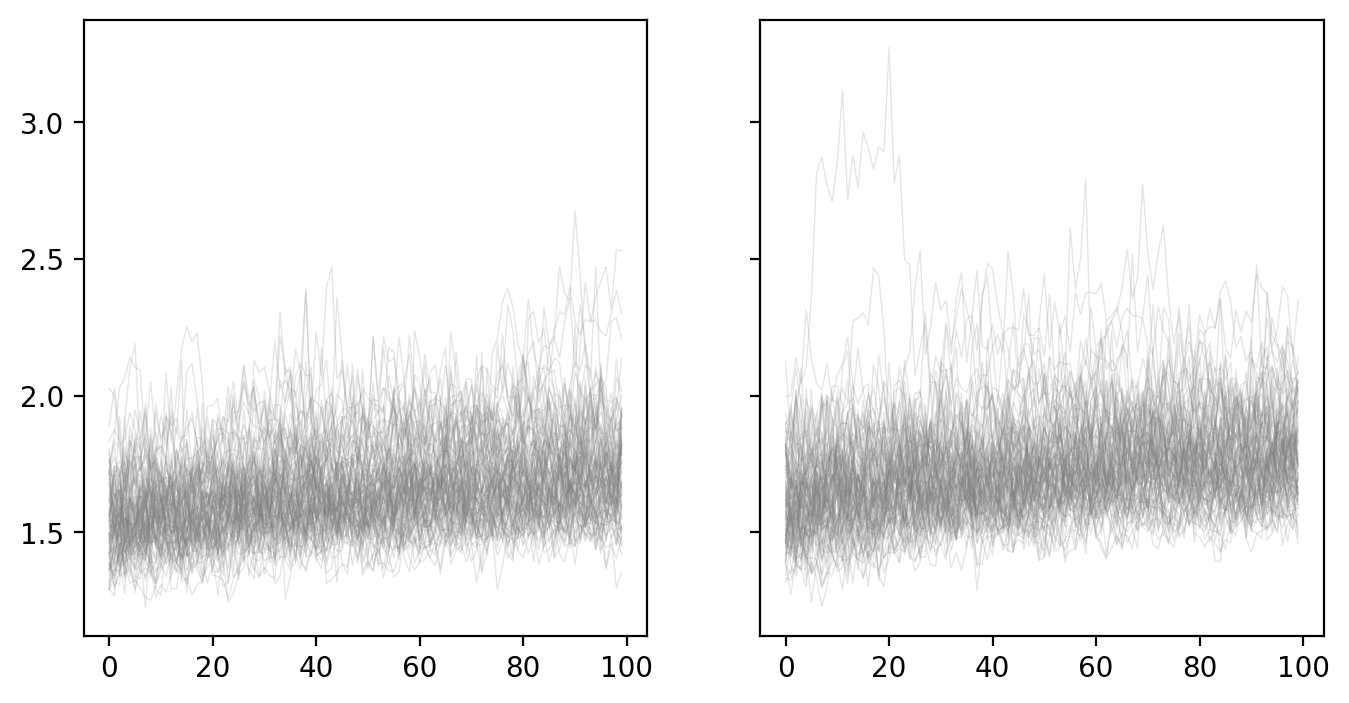

In [19]:
#Plots all repeats onto one figure
fig, ax = plt.subplots(1,2, sharey=True, figsize = (10,4))

for structure in STRUCTURES:
    rmsd = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/{structure}_0rmsd.dat")
    apo_rmsd = np.loadtxt(fname=f"{FOLDER_PROD}/{structure}/apo/{structure}_0rmsd.dat")
    ax[0].plot(rmsd, linewidth= 0.5, color = 'grey', alpha=0.2)
    
    ax[1].plot(apo_rmsd, linewidth= 0.5, color = 'grey', alpha=0.2)

0.815_1ohp_Rosetta_1ohp_Rosetta_Design_7034
ASP
0.823_1ohp_Rosetta_1ohp_Rosetta_Design_8062
ASP
0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7390
ASP
0.852_1ohp_Rosetta_1ohp_Rosetta_Relax_7672
ASP
0.823_1ohp_Rosetta_1ohp_Rosetta_Design_6900
ASP
0.828_1ohp_Rosetta_1ohp_Rosetta_Design_7018
ASP
0.817_1ohp_Rosetta_1ohp_Rosetta_Design_7325
ASP
0.812_1ohp_Rosetta_1ohp_Rosetta_Design_7272
ASP


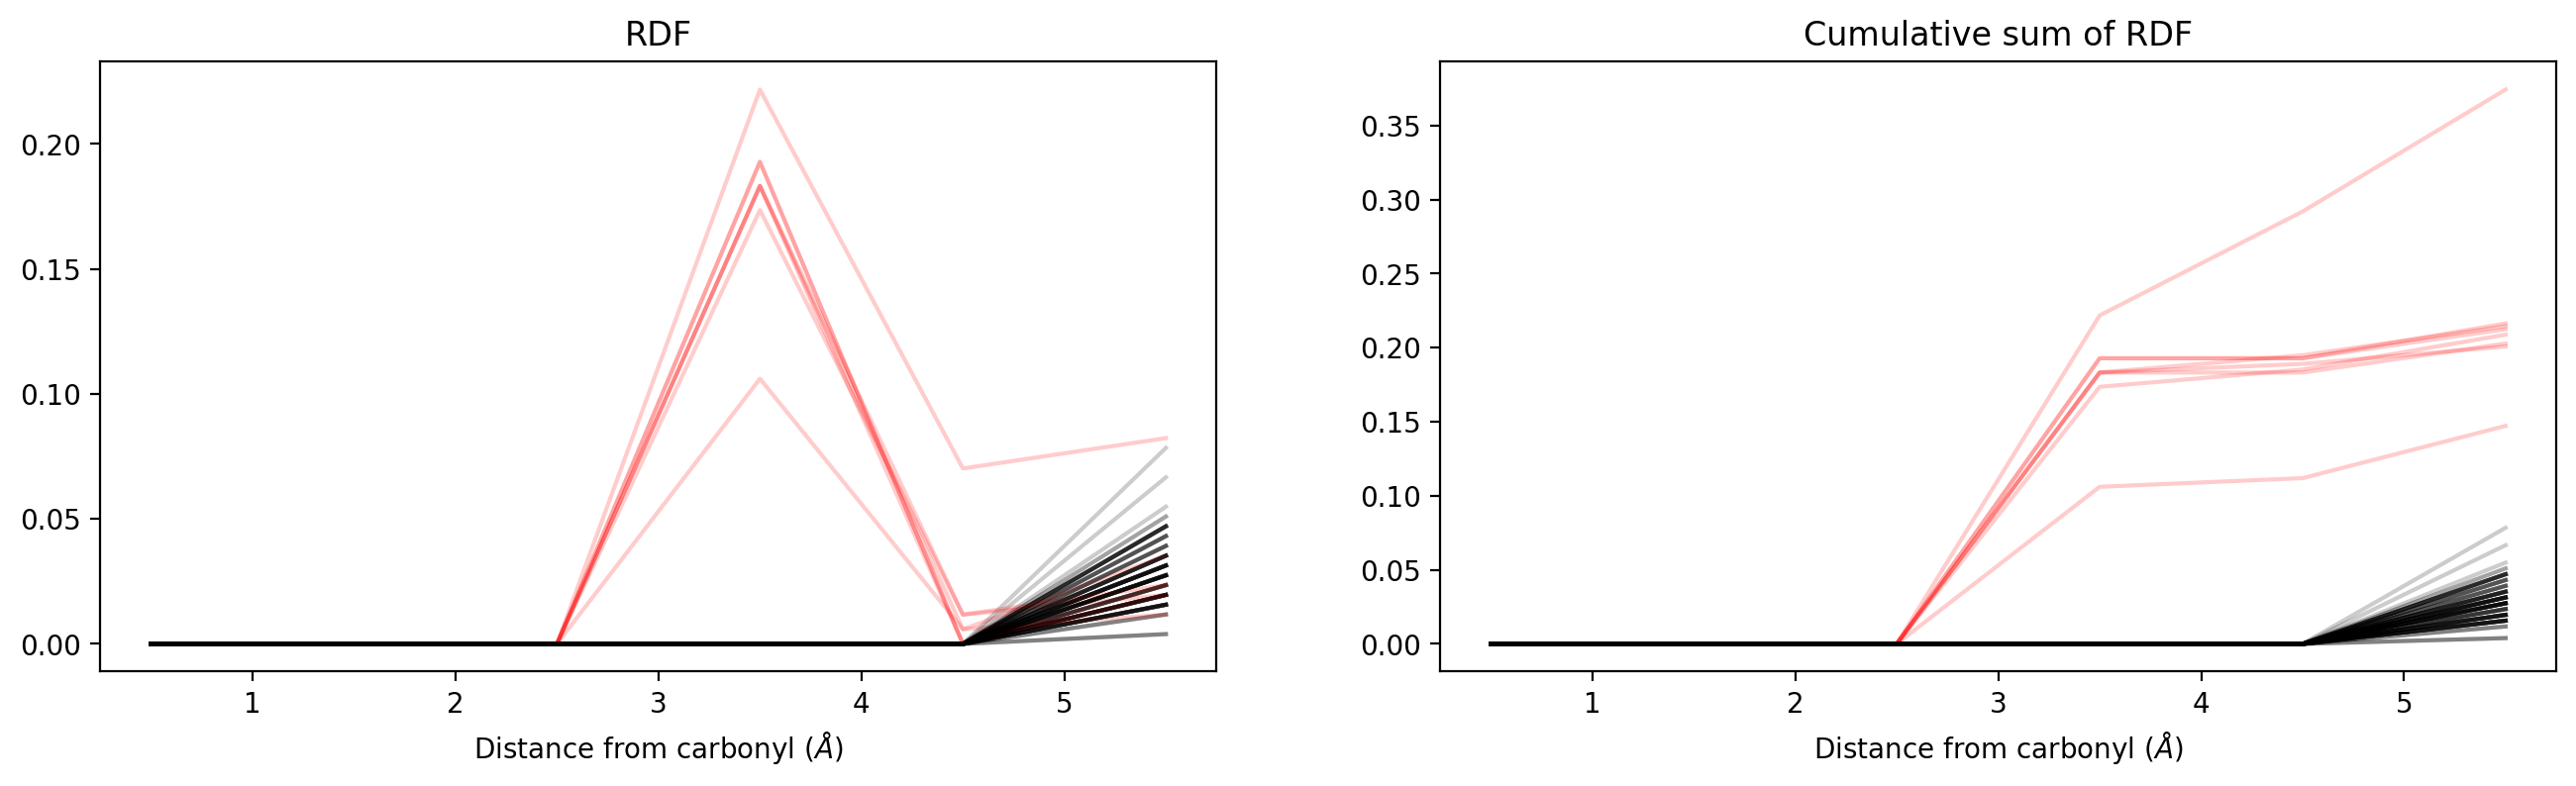

In [30]:
#Radial distribution functions

rdf_cumsums_45 = []
cat_resis = []

fig, ax = plt.subplots(1,2, figsize=(16,4))

for structure in STRUCTURES:
    traj = pt.load(f"{FOLDER_PROD}/{structure}/{structure}_prod.nc", top=f"{FOLDER_PA}/{structure}/{structure}.parm7")
    #print(len(traj))

    rdf_data = pt.rdf(traj=traj[80:], solute_mask=f":99@CD,CG", solvent_mask=":WAT@O", bin_spacing=1, maximum=6) 

    for residue in traj[":99"].topology.residues:
        cat_resis.append(residue.name)
    
    if np.any(rdf_data[1][:4]>0):
        print(structure)
        color = 'r'  
        print(residue.name)
    else:
        color = 'k'

#print(rdf_data)
    ax[0].plot(rdf_data[0], rdf_data[1], color=color, alpha=0.2)
    ax[1].plot(rdf_data[0], np.cumsum(rdf_data[1]), color=color, alpha=0.2)

    ax[0].set_title("RDF")
    ax[1].set_title("Cumulative sum of RDF")

    rdf_cumsums_45.append(rdf_data[1][4])

#print(rdf_data[0])
for ax in ax:
    ax.set_xlabel(r"Distance from carbonyl ($\AA$)")

In [31]:
results["Cat resis"] = cat_resis
results["RDF cumsum 4.5"] = rdf_cumsums_45

In [32]:
results

,Structure,Avg RMSD,Avg ligand RMSD,Ligand base distance,Cat resis,RDF cumsum 4.5
0,0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787,1.643431,0.822126,3.558687,ASP,0.0
1,0.838_1ohp_Rosetta_1ohp_Rosetta_Relax_7172,1.774719,0.953397,3.650974,ASP,0.0
2,0.825_1ohp_Rosetta_1ohp_Rosetta_Design_8289,1.668399,1.213984,3.624892,ASP,0.0
3,0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7673,1.620440,0.636676,3.742989,ASP,0.0
4,0.836_1ohp_Rosetta_1ohp_Rosetta_Design_8486,1.646299,0.902568,3.557029,ASP,0.0
...,...,...,...,...,...,...
95,0.824_1ohp_Rosetta_1ohp_Rosetta_Relax_8565,1.611673,0.732585,3.674320,ASP,0.0
96,0.817_1ohp_Rosetta_1ohp_Rosetta_Design_7408,1.651921,0.991713,3.617814,ASP,0.0
97,0.837_1ohp_Rosetta_1ohp_Rosetta_Design_9541,1.737724,1.122874,3.684934,ASP,0.0
98,0.833_1ohp_Rosetta_1ohp_Rosetta_Relax_7491,1.723220,1.175108,3.623491,ASP,0.0


In [95]:
results.to_csv("MD_results.csv")

In [36]:
design_indices = "7,10,11,14,15,18,26,29,30,38,54,55,58,59,63,65,71,73,78,80,82,84,86,93,95,97,99,101,103,109,112,114,116,121"

In [40]:
print(f":{design_indices}")

:7,10,11,14,15,18,26,29,30,38,54,55,58,59,63,65,71,73,78,80,82,84,86,93,95,97,99,101,103,109,112,114,116,121


In [42]:
apo_holo_rmsds = []

for structure in STRUCTURES:
    holo_fpath = f"{FOLDER_PROD}/{structure}/{structure}_prod.nc"
    apo_fpath = f"{FOLDER_PROD}/{structure}/apo/{structure}_prod.nc"

    holo_top = pt.load_topology(f"{FOLDER_PA}/{structure}/{structure}.parm7")
    apo_top = pt.load_topology(f"{FOLDER_PA}/{structure}/{structure}_apo.parm7")

    # holo_traj = pt.load(holo_fpath, top=holo_top)["!:5TS,WAT"]
    # apo_traj = pt.load(apo_fpath, top=apo_top)["!:WAT"]

    holo_traj = pt.load(holo_fpath, top=holo_top)[f":{design_indices}"]
    apo_traj = pt.load(apo_fpath, top=apo_top)[f":{design_indices}"]

    holo_avg_frame = pt.get_average_frame(holo_traj)
    apo_avg_frame = pt.get_average_frame(apo_traj)

    rmsd = holo_avg_frame.rmsd(apo_avg_frame)
    apo_holo_rmsds.append(rmsd)


In [44]:
results["Apo-holo RMSDs design_idxs"] = apo_holo_rmsds

In [48]:
field_target = """:5TS@C9 :5TS@H04
"""

with open(f"field_target.dat", "w") as f:
    f.write(field_target)

FOLDER_FIELD = f"5_Fields_{folder_title}"

os.makedirs(f"{FOLDER_FIELD}", exist_ok=True)

In [88]:
#!jupyter nbconvert --to script ../TOOLS/FieldTools.ipynb &>2

commands_to_run = []

for structure in STRUCTURES:  

    os.makedirs(f"{FOLDER_FIELD}/{structure}", exist_ok=True)
    
    nc_filename  = f"{FOLDER_PROD}/{structure}/{structure}_prod.nc"
    out_filename = f"{FOLDER_FIELD}/{structure}/{structure}.pkl"
    parm         = f"{FOLDER_PA}/{structure}/{structure}.parm7"
    #out          = f"{filename_out}_md_QM_PM6_1000_wat_field.pkl"
    target       = f"field_target.dat"
    #exclude      = f"{FOLDER_FIELDS}/{state}_exclude.dat"
    
    if os.path.isfile(out_filename): 
        print("done ", structure)
        continue

    if not os.path.isfile(nc_filename):
        print("missing ",nc_filename)
        continue

    commands_to_run.append(f"python FieldTools.py -nc {nc_filename} -parm {parm} -out {out_filename} -target {target}")

done  0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787
done  0.838_1ohp_Rosetta_1ohp_Rosetta_Relax_7172
done  0.825_1ohp_Rosetta_1ohp_Rosetta_Design_8289
done  0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7673
done  0.836_1ohp_Rosetta_1ohp_Rosetta_Design_8486
done  0.843_1ohp_Rosetta_1ohp_Rosetta_Relax_8445
done  0.840_1ohp_Rosetta_1ohp_Rosetta_Relax_7078
done  0.845_1ohp_Rosetta_1ohp_Rosetta_Relax_7369
done  0.845_1ohp_Rosetta_1ohp_Rosetta_Design_10000
done  0.815_1ohp_Rosetta_1ohp_Rosetta_Design_9686
done  0.859_1ohp_Rosetta_1ohp_Rosetta_Relax_7750
done  0.814_1ohp_Rosetta_1ohp_Rosetta_Design_7447
done  0.817_1ohp_Rosetta_1ohp_Rosetta_Design_8132
done  0.841_1ohp_Rosetta_1ohp_Rosetta_Design_8938
done  0.824_1ohp_Rosetta_1ohp_Rosetta_Relax_6411
done  0.832_1ohp_Rosetta_1ohp_Rosetta_Relax_7839
done  0.819_1ohp_Rosetta_1ohp_Rosetta_Design_8165
done  0.832_1ohp_Rosetta_1ohp_Rosetta_Design_7189
done  0.841_1ohp_Rosetta_1ohp_Rosetta_Design_8659
done  0.847_1ohp_Rosetta_1ohp_Rosetta_Relax_8041
done  0.

In [80]:
string_to_run = '\n'.join(commands_to_run)

with open("Fields.sh", "w") as f:
    f.write(f"""#!/bin/bash
#SBATCH --partition test,mwvdk
#SBATCH --time=1:00:00    # walltime
#SBATCH --nodes=1            # number of tasks
#SBATCH --mem=2G
#SBATCH --job-name=Fields
#SBATCH --output=slurm_outputs/Fields
#SBATCH --account=ptch000721
#SBATCH --verbose

# 2. Set directories
cd {os.getcwd()}

# Run Fields
{string_to_run}

""")

os.system("sbatch Fields.sh")

Submitted batch job 9013061


0

In [87]:
!squeue --me

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           9013061      test   Fields  qz22231  R      13:40      1 bp1-compute007


In [51]:
import pickle

In [90]:
avg_fields = []

for structure in STRUCTURES:

    fields = pickle.load(open(f"{FOLDER_FIELD}/{structure}/{structure}.pkl", 'rb'), encoding='latin1')
    avg_fields.append(np.mean(fields[':5TS@C9_:5TS@H04']['Total'][-20:]))

In [91]:
results["Average E Field"] = avg_fields

In [97]:
results

,Structure,Avg RMSD,Avg ligand RMSD,Ligand base distance,Cat resis,RDF cumsum 4.5,Apo-holo RMSDs,Apo-holo RMSDs design_idxs,Average E Field
0,0.842_1ohp_Rosetta_1ohp_Rosetta_Relax_7787,1.588095,0.758135,3.565498,ASP,0.0,0.803460,0.775404,174.020471
1,0.838_1ohp_Rosetta_1ohp_Rosetta_Relax_7172,1.753381,0.942914,3.670620,ASP,0.0,1.629529,1.471464,177.003364
2,0.825_1ohp_Rosetta_1ohp_Rosetta_Design_8289,1.640861,1.244103,3.607117,ASP,0.0,1.445219,1.105490,164.817764
3,0.820_1ohp_Rosetta_1ohp_Rosetta_Design_7673,1.580095,0.636261,3.703424,ASP,0.0,1.364812,1.073022,178.216381
4,0.836_1ohp_Rosetta_1ohp_Rosetta_Design_8486,1.621088,0.876053,3.575407,ASP,0.0,1.447299,1.297324,168.103196
...,...,...,...,...,...,...,...,...,...
95,0.824_1ohp_Rosetta_1ohp_Rosetta_Relax_8565,1.624965,0.667595,3.686978,ASP,0.0,0.920886,0.831129,182.777615
96,0.817_1ohp_Rosetta_1ohp_Rosetta_Design_7408,1.633591,1.018534,3.641598,ASP,0.0,1.668094,1.283116,166.798113
97,0.837_1ohp_Rosetta_1ohp_Rosetta_Design_9541,1.668100,1.121363,3.699483,ASP,0.0,0.822946,0.652078,169.718274
98,0.833_1ohp_Rosetta_1ohp_Rosetta_Relax_7491,1.800946,1.291160,3.625163,ASP,0.0,1.099852,1.091407,175.381075


In [98]:
results.to_csv("MD_results.csv", index=False)